In [1]:
% display typeset

In [2]:
def achaBt(t, tempos, B0, rho, method = "r"):
    indice = 0
    beta = B0
    
    if t <= tempos[0]:
        if method == "r":
            beta = beta * (1 - rho[indice])
        else:
            beta = beta * math.exp(- rho[indice] * t)
        return beta, indice
    
    while t >= tempos[indice]:
        if indice == len(tempos) - 1 or t < tempos[indice + 1]:
            if t == tempos[indice - 1]:
                return beta, indice
            if method == "r":
                beta = beta * (1 - rho[indice] * (t - tempos[indice - 1]) / t)
            else:
                beta = beta * math.exp(- rho[indice] * (t - tempos[indice]))
                
            return beta, indice
        
        else:
            if indice == 0:
                if method == "r":
                    beta = beta * (1 - rho[indice])
                else:
                    beta = beta * math.exp(- rho[indice] * t)
            else:
                if method == "r":
                    beta = beta * (1 - rho[indice] * (tempos[indice] - tempos[indice - 1]) / tempos[indice])
                else:
                    beta = beta * math.exp(- rho[indice] * (tempos[indice] - tempos[indice - 1]))
            
        indice += 1
    

/opt/sagemath-9.0/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


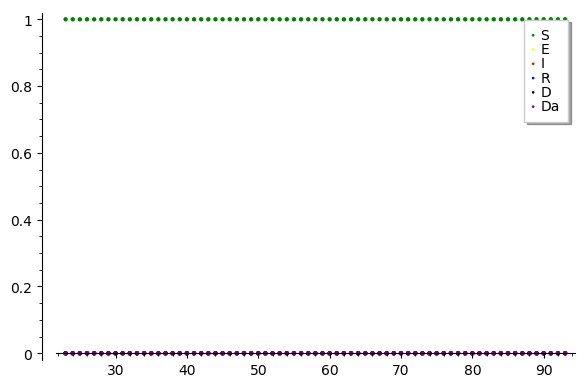

In [103]:
T = ode_solver()
T.function = model
inits = [1 - 1e-6, 0, 1e-6, 0, 0, 0]
tspan = [23, 93]
T.ode_solve(tspan, inits, num_points = 93 - 23, params = [0.21, 3.8/0.21, 22, 0.1, 0.5, 0.05])

model_out_0 = [(k[0], k[1][0]) for k in T.solution]
model_out_1 = [(k[0], k[1][1]) for k in T.solution]
model_out_2 = [(k[0], k[1][2]) for k in T.solution]
model_out_3 = [(k[0], k[1][3]) for k in T.solution]
model_out_4 = [(k[0], k[1][4]) for k in T.solution]
model_out_5 = [(k[0], k[1][5]) for k in T.solution]

plot0 = list_plot(model_out_0, color = 'green', pointsize = 10, alpha = 1, legend_label = 'S')
plot1 = list_plot(model_out_1, color = 'yellow', pointsize = 10, alpha = 1, legend_label = 'E')
plot2 = list_plot(model_out_2, color = 'red', pointsize = 10, alpha = 1, legend_label = 'I')
plot3 = list_plot(model_out_3, color = 'blue', pointsize = 10, alpha = 1, legend_label = 'R')
plot4 = list_plot(model_out_4, color = 'black', pointsize = 10, alpha = 1, legend_label = 'D')
plot5 = list_plot(model_out_5, color = 'purple', pointsize = 10, alpha = 1, legend_label = 'Da')

plot0.legend()
plot1.legend()
plot2.legend()
plot3.legend()
plot4.legend()
plot5.legend()

show(plot0 + plot1 + plot2 + plot3 + plot4 + plot5)

# Estimação burra de parâmetros

In [32]:
model_out_1

[(23, 0),
 (24.0, 1.88765505367936e-07),
 (25.0, 3.493690838478631e-07),
 (26.0, 4.882777796129696e-07),
 (27.0, 6.105533822700962e-07),
 (28.0, 7.201749567934518e-07),
 (29.0, 8.202841679980836e-07),
 (30.0, 9.133727875529404e-07),
 (31.0, 1.0014266782835727e-06),
 (32.0, 1.0860368302605628e-06),
 (33.0, 1.1684853248336372e-06),
 (34.0, 1.2498121297655085e-06),
 (35.0, 1.3308671752545002e-06),
 (36.0, 1.4123510827546825e-06),
 (37.0, 1.494847114090846e-06),
 (38.0, 1.578846304578893e-06),
 (39.0, 1.664767288252178e-06),
 (40.0, 1.7529719778067094e-06),
 (41.0, 1.843777998704293e-06),
 (42.0, 1.9374685755558943e-06),
 (43.0, 2.0343004143060412e-06),
 (44.0, 2.1345100045808278e-06),
 (45.0, 2.2383186744104993e-06),
 (46.0, 2.345936658046818e-06),
 (47.0, 2.4575663819698183e-06),
 (48.0, 2.5734051307782534e-06),
 (49.0, 2.6936472207090146e-06),
 (50.0, 2.818485781910831e-06),
 (51.0, 2.948114229677316e-06),
 (52.0, 3.082727488368694e-06),
 (53.0, 3.2225230187503144e-06),
 (54.0, 3.367701689197543e-06),
 (55.0, 3.5184685230763974e-06),
 (56.0, 3.6750333481520257e-06),
 (57.0, 3.837611368747024e-06),
 (58.0, 4.0064236772900636e-06),
 (59.0, 4.1816977186437735e-06),
 (60.0, 4.363667718007299e-06),
 (61.0, 4.552575081118034e-06),
 (62.0, 4.748668773821706e-06),
 (63.0, 4.952205686755729e-06),
 (64.0, 5.16345098983052e-06),
 (65.0, 5.3826784803441554e-06),
 (66.0, 5.6101709278850895e-06),
 (67.0, 5.846220418632052e-06),
 (68.0, 6.091128701222919e-06),
 (69.0, 6.3452075360139244e-06),
 (70.0, 6.608779049270015e-06),
 (71.0, 6.882176093602791e-06),
 (72.0, 7.165742615793354e-06),
 (73.0, 7.45983403299482e-06),
 (74.0, 7.764817618196169e-06),
 (75.0, 8.081072895739859e-06),
 (76.0, 8.408992047615732e-06),
 (77.0, 8.748980331199519e-06),
 (78.0, 9.101456509062746e-06),
 (79.0, 9.466853291449762e-06),
 (80.0, 9.845617791994982e-06),
 (81.0, 1.0238211997237784e-05),
 (82.0, 1.0645113250482506e-05),
 (83.0, 1.1066814750545778e-05),
 (84.0, 1.1503826065932056e-05),
 (85.0, 1.195667366498017e-05),
 (86.0, 1.2425901462528304e-05),
 (87.0, 1.2912071383651852e-05),
 (88.0, 1.3415763945037493e-05),
 (89.0, 1.3937578854567468e-05),
 (90.0, 1.4478135629700192e-05),
 (91.0, 1.5038074235246741e-05),
 (92.0, 1.561805574115734e-05),
 (93.0, 1.621876300094766e-05)]

In [71]:
import random as rd
import numpy as np

pop = 60461828
tspan = [23, 93]
real_data = np.genfromtxt('data.csv', delimiter=',')[1:]
data =[]

for k in real_data:
    if tspan[0] <= k[0] <= tspan[1]:
        data.append((k[0], k[1]/pop, k[3]/pop))

##########################################################################################################

T = ode_solver()
T.function = model
inits = [1 - 1e-6, 0, 1e-6, 0, 0, 0]

ideal = [0, 0, 0, 0, 0, 0]
erro_I = 10000000000
erro_D = 10000000000

for i in range(20000):
    if (i + 1) % 1000:
        print("Iteração", i + 1)
    B0 = rd.random()
    Ti = rd.randint(1, 31)
    t0 = tspan[0]
    alpha = rd.random()
    rho = rd.random()
    f = rd.random()
    
    T.ode_solve(tspan, inits, num_points = tspan[1] - tspan[0], params = [B0, Ti, t0, alpha, rho, f])

    model_out_0 = [(k[0], k[1][0]) for k in T.solution]
    model_out_1 = [(k[0], k[1][1]) for k in T.solution]
    model_out_2 = [(k[0], k[1][2]) for k in T.solution]
    model_out_3 = [(k[0], k[1][3]) for k in T.solution]
    model_out_4 = [(k[0], k[1][4]) for k in T.solution]
    model_out_5 = [(k[0], k[1][5]) for k in T.solution]
    
    erro_I_n = 0
    erro_D_n = 0
    for i in range(tspan[1] - tspan[0]):
        erro_I_n += (model_out_2[i][1] - data[i][1])**2
        erro_D_n += (model_out_5[i][1] - data[i][2])**2
    
    if erro_I_n + erro_D_n <= erro_I + erro_D:
        ideal = [B0, Ti, t0, alpha, rho, f]
    
    erro_I = erro_I_n
    erro_D = erro_D_n
    
##########################################################################################################

T.ode_solve(tspan, inits, num_points = tspan[1] - tspan[0], params = ideal)

model_out_0 = [(k[0], k[1][0]) for k in T.solution]
model_out_1 = [(k[0], k[1][1]) for k in T.solution]
model_out_2 = [(k[0], k[1][2]) for k in T.solution]
model_out_3 = [(k[0], k[1][3]) for k in T.solution]
model_out_4 = [(k[0], k[1][4]) for k in T.solution]
model_out_5 = [(k[0], k[1][5]) for k in T.solution]




plot0 = list_plot(model_out_0, color = 'green', pointsize = 10, alpha = 1, legend_label = 'S')
plot1 = list_plot(model_out_1, color = 'yellow', pointsize = 10, alpha = 1, legend_label = 'E')
plot2 = list_plot(model_out_2, color = 'red', pointsize = 10, alpha = 1, legend_label = 'I')
plot3 = list_plot(model_out_3, color = 'blue', pointsize = 10, alpha = 1, legend_label = 'R')
plot4 = list_plot(model_out_4, color = 'black', pointsize = 10, alpha = 1, legend_label = 'D')
plot5 = list_plot(model_out_5, color = 'purple', pointsize = 10, alpha = 1, legend_label = 'Da')

plot0.legend()
plot1.legend()
plot2.legend()
plot3.legend()
plot4.legend()
plot5.legend()

# show(plot1 + plot2 + plot3 + plot4 + plot5)

Iteração 1
Iteração 2
Iteração 3
Iteração 4
Iteração 5
Iteração 6
Iteração 7
Iteração 8
Iteração 9
Iteração 10
Iteração 11
Iteração 12
Iteração 13
Iteração 14
Iteração 15
Iteração 16
Iteração 17
Iteração 18
Iteração 19
Iteração 20
Iteração 21
Iteração 22
Iteração 23
Iteração 24
Iteração 25
Iteração 26
Iteração 27
Iteração 28
Iteração 29
Iteração 30
Iteração 31
Iteração 32
Iteração 33
Iteração 34
Iteração 35
Iteração 36
Iteração 37
Iteração 38
Iteração 39
Iteração 40
Iteração 41
Iteração 42
Iteração 43
Iteração 44
Iteração 45
Iteração 46
Iteração 47
Iteração 48
Iteração 49
Iteração 50
Iteração 51
Iteração 52
Iteração 53
Iteração 54
Iteração 55
Iteração 56
Iteração 57
Iteração 58
Iteração 59
Iteração 60
Iteração 61
Iteração 62
Iteração 63
Iteração 64
Iteração 65
Iteração 66
Iteração 67
Iteração 68
Iteração 69
Iteração 70
Iteração 71
Iteração 72
Iteração 73
Iteração 74
Iteração 75
Iteração 76
Iteração 77
Iteração 78
Iteração 79
Iteração 80
Iteração 81
Iteração 82
Iteração 83
Iteração 84
I

Iteração 642
Iteração 643
Iteração 644
Iteração 645
Iteração 646
Iteração 647
Iteração 648
Iteração 649
Iteração 650
Iteração 651
Iteração 652
Iteração 653
Iteração 654
Iteração 655
Iteração 656
Iteração 657
Iteração 658
Iteração 659
Iteração 660
Iteração 661
Iteração 662
Iteração 663
Iteração 664
Iteração 665
Iteração 666
Iteração 667
Iteração 668
Iteração 669
Iteração 670
Iteração 671
Iteração 672
Iteração 673
Iteração 674
Iteração 675
Iteração 676
Iteração 677
Iteração 678
Iteração 679
Iteração 680
Iteração 681
Iteração 682
Iteração 683
Iteração 684
Iteração 685
Iteração 686
Iteração 687
Iteração 688
Iteração 689
Iteração 690
Iteração 691
Iteração 692
Iteração 693
Iteração 694
Iteração 695
Iteração 696
Iteração 697
Iteração 698
Iteração 699
Iteração 700
Iteração 701
Iteração 702
Iteração 703
Iteração 704
Iteração 705
Iteração 706
Iteração 707
Iteração 708
Iteração 709
Iteração 710
Iteração 711
Iteração 712
Iteração 713
Iteração 714
Iteração 715
Iteração 716
Iteração 717
Iteração 718

Iteração 1272
Iteração 1273
Iteração 1274
Iteração 1275
Iteração 1276
Iteração 1277
Iteração 1278
Iteração 1279
Iteração 1280
Iteração 1281
Iteração 1282
Iteração 1283
Iteração 1284
Iteração 1285
Iteração 1286
Iteração 1287
Iteração 1288
Iteração 1289
Iteração 1290
Iteração 1291
Iteração 1292
Iteração 1293
Iteração 1294
Iteração 1295
Iteração 1296
Iteração 1297
Iteração 1298
Iteração 1299
Iteração 1300
Iteração 1301
Iteração 1302
Iteração 1303
Iteração 1304
Iteração 1305
Iteração 1306
Iteração 1307
Iteração 1308
Iteração 1309
Iteração 1310
Iteração 1311
Iteração 1312
Iteração 1313
Iteração 1314
Iteração 1315
Iteração 1316
Iteração 1317
Iteração 1318
Iteração 1319
Iteração 1320
Iteração 1321
Iteração 1322
Iteração 1323
Iteração 1324
Iteração 1325
Iteração 1326
Iteração 1327
Iteração 1328
Iteração 1329
Iteração 1330
Iteração 1331
Iteração 1332
Iteração 1333
Iteração 1334
Iteração 1335
Iteração 1336
Iteração 1337
Iteração 1338
Iteração 1339
Iteração 1340
Iteração 1341
Iteração 1342
Iteraç

Iteração 1875
Iteração 1876
Iteração 1877
Iteração 1878
Iteração 1879
Iteração 1880
Iteração 1881
Iteração 1882
Iteração 1883
Iteração 1884
Iteração 1885
Iteração 1886
Iteração 1887
Iteração 1888
Iteração 1889
Iteração 1890
Iteração 1891
Iteração 1892
Iteração 1893
Iteração 1894
Iteração 1895
Iteração 1896
Iteração 1897
Iteração 1898
Iteração 1899
Iteração 1900
Iteração 1901
Iteração 1902
Iteração 1903
Iteração 1904
Iteração 1905
Iteração 1906
Iteração 1907
Iteração 1908
Iteração 1909
Iteração 1910
Iteração 1911
Iteração 1912
Iteração 1913
Iteração 1914
Iteração 1915
Iteração 1916
Iteração 1917
Iteração 1918
Iteração 1919
Iteração 1920
Iteração 1921
Iteração 1922
Iteração 1923
Iteração 1924
Iteração 1925
Iteração 1926
Iteração 1927
Iteração 1928
Iteração 1929
Iteração 1930
Iteração 1931
Iteração 1932
Iteração 1933
Iteração 1934
Iteração 1935
Iteração 1936
Iteração 1937
Iteração 1938
Iteração 1939
Iteração 1940
Iteração 1941
Iteração 1942
Iteração 1943
Iteração 1944
Iteração 1945
Iteraç

Iteração 2504
Iteração 2505
Iteração 2506
Iteração 2507
Iteração 2508
Iteração 2509
Iteração 2510
Iteração 2511
Iteração 2512
Iteração 2513
Iteração 2514
Iteração 2515
Iteração 2516
Iteração 2517
Iteração 2518
Iteração 2519
Iteração 2520
Iteração 2521
Iteração 2522
Iteração 2523
Iteração 2524
Iteração 2525
Iteração 2526
Iteração 2527
Iteração 2528
Iteração 2529
Iteração 2530
Iteração 2531
Iteração 2532
Iteração 2533
Iteração 2534
Iteração 2535
Iteração 2536
Iteração 2537
Iteração 2538
Iteração 2539
Iteração 2540
Iteração 2541
Iteração 2542
Iteração 2543
Iteração 2544
Iteração 2545
Iteração 2546
Iteração 2547
Iteração 2548
Iteração 2549
Iteração 2550
Iteração 2551
Iteração 2552
Iteração 2553
Iteração 2554
Iteração 2555
Iteração 2556
Iteração 2557
Iteração 2558
Iteração 2559
Iteração 2560
Iteração 2561
Iteração 2562
Iteração 2563
Iteração 2564
Iteração 2565
Iteração 2566
Iteração 2567
Iteração 2568
Iteração 2569
Iteração 2570
Iteração 2571
Iteração 2572
Iteração 2573
Iteração 2574
Iteraç

Iteração 3102
Iteração 3103
Iteração 3104
Iteração 3105
Iteração 3106
Iteração 3107
Iteração 3108
Iteração 3109
Iteração 3110
Iteração 3111
Iteração 3112
Iteração 3113
Iteração 3114
Iteração 3115
Iteração 3116
Iteração 3117
Iteração 3118
Iteração 3119
Iteração 3120
Iteração 3121
Iteração 3122
Iteração 3123
Iteração 3124
Iteração 3125
Iteração 3126
Iteração 3127
Iteração 3128
Iteração 3129
Iteração 3130
Iteração 3131
Iteração 3132
Iteração 3133
Iteração 3134
Iteração 3135
Iteração 3136
Iteração 3137
Iteração 3138
Iteração 3139
Iteração 3140
Iteração 3141
Iteração 3142
Iteração 3143
Iteração 3144
Iteração 3145
Iteração 3146
Iteração 3147
Iteração 3148
Iteração 3149
Iteração 3150
Iteração 3151
Iteração 3152
Iteração 3153
Iteração 3154
Iteração 3155
Iteração 3156
Iteração 3157
Iteração 3158
Iteração 3159
Iteração 3160
Iteração 3161
Iteração 3162
Iteração 3163
Iteração 3164
Iteração 3165
Iteração 3166
Iteração 3167
Iteração 3168
Iteração 3169
Iteração 3170
Iteração 3171
Iteração 3172
Iteraç

Iteração 3689
Iteração 3690
Iteração 3691
Iteração 3692
Iteração 3693
Iteração 3694
Iteração 3695
Iteração 3696
Iteração 3697
Iteração 3698
Iteração 3699
Iteração 3700
Iteração 3701
Iteração 3702
Iteração 3703
Iteração 3704
Iteração 3705
Iteração 3706
Iteração 3707
Iteração 3708
Iteração 3709
Iteração 3710
Iteração 3711
Iteração 3712
Iteração 3713
Iteração 3714
Iteração 3715
Iteração 3716
Iteração 3717
Iteração 3718
Iteração 3719
Iteração 3720
Iteração 3721
Iteração 3722
Iteração 3723
Iteração 3724
Iteração 3725
Iteração 3726
Iteração 3727
Iteração 3728
Iteração 3729
Iteração 3730
Iteração 3731
Iteração 3732
Iteração 3733
Iteração 3734
Iteração 3735
Iteração 3736
Iteração 3737
Iteração 3738
Iteração 3739
Iteração 3740
Iteração 3741
Iteração 3742
Iteração 3743
Iteração 3744
Iteração 3745
Iteração 3746
Iteração 3747
Iteração 3748
Iteração 3749
Iteração 3750
Iteração 3751
Iteração 3752
Iteração 3753
Iteração 3754
Iteração 3755
Iteração 3756
Iteração 3757
Iteração 3758
Iteração 3759
Iteraç

Iteração 4277
Iteração 4278
Iteração 4279
Iteração 4280
Iteração 4281
Iteração 4282
Iteração 4283
Iteração 4284
Iteração 4285
Iteração 4286
Iteração 4287
Iteração 4288
Iteração 4289
Iteração 4290
Iteração 4291
Iteração 4292
Iteração 4293
Iteração 4294
Iteração 4295
Iteração 4296
Iteração 4297
Iteração 4298
Iteração 4299
Iteração 4300
Iteração 4301
Iteração 4302
Iteração 4303
Iteração 4304
Iteração 4305
Iteração 4306
Iteração 4307
Iteração 4308
Iteração 4309
Iteração 4310
Iteração 4311
Iteração 4312
Iteração 4313
Iteração 4314
Iteração 4315
Iteração 4316
Iteração 4317
Iteração 4318
Iteração 4319
Iteração 4320
Iteração 4321
Iteração 4322
Iteração 4323
Iteração 4324
Iteração 4325
Iteração 4326
Iteração 4327
Iteração 4328
Iteração 4329
Iteração 4330
Iteração 4331
Iteração 4332
Iteração 4333
Iteração 4334
Iteração 4335
Iteração 4336
Iteração 4337
Iteração 4338
Iteração 4339
Iteração 4340
Iteração 4341
Iteração 4342
Iteração 4343
Iteração 4344
Iteração 4345
Iteração 4346
Iteração 4347
Iteraç

Iteração 4866
Iteração 4867
Iteração 4868
Iteração 4869
Iteração 4870
Iteração 4871
Iteração 4872
Iteração 4873
Iteração 4874
Iteração 4875
Iteração 4876
Iteração 4877
Iteração 4878
Iteração 4879
Iteração 4880
Iteração 4881
Iteração 4882
Iteração 4883
Iteração 4884
Iteração 4885
Iteração 4886
Iteração 4887
Iteração 4888
Iteração 4889
Iteração 4890
Iteração 4891
Iteração 4892
Iteração 4893
Iteração 4894
Iteração 4895
Iteração 4896
Iteração 4897
Iteração 4898
Iteração 4899
Iteração 4900
Iteração 4901
Iteração 4902
Iteração 4903
Iteração 4904
Iteração 4905
Iteração 4906
Iteração 4907
Iteração 4908
Iteração 4909
Iteração 4910
Iteração 4911
Iteração 4912
Iteração 4913
Iteração 4914
Iteração 4915
Iteração 4916
Iteração 4917
Iteração 4918
Iteração 4919
Iteração 4920
Iteração 4921
Iteração 4922
Iteração 4923
Iteração 4924
Iteração 4925
Iteração 4926
Iteração 4927
Iteração 4928
Iteração 4929
Iteração 4930
Iteração 4931
Iteração 4932
Iteração 4933
Iteração 4934
Iteração 4935
Iteração 4936
Iteraç

Iteração 5471
Iteração 5472
Iteração 5473
Iteração 5474
Iteração 5475
Iteração 5476
Iteração 5477
Iteração 5478
Iteração 5479
Iteração 5480
Iteração 5481
Iteração 5482
Iteração 5483
Iteração 5484
Iteração 5485
Iteração 5486
Iteração 5487
Iteração 5488
Iteração 5489
Iteração 5490
Iteração 5491
Iteração 5492
Iteração 5493
Iteração 5494
Iteração 5495
Iteração 5496
Iteração 5497
Iteração 5498
Iteração 5499
Iteração 5500
Iteração 5501
Iteração 5502
Iteração 5503
Iteração 5504
Iteração 5505
Iteração 5506
Iteração 5507
Iteração 5508
Iteração 5509
Iteração 5510
Iteração 5511
Iteração 5512
Iteração 5513
Iteração 5514
Iteração 5515
Iteração 5516
Iteração 5517
Iteração 5518
Iteração 5519
Iteração 5520
Iteração 5521
Iteração 5522
Iteração 5523
Iteração 5524
Iteração 5525
Iteração 5526
Iteração 5527
Iteração 5528
Iteração 5529
Iteração 5530
Iteração 5531
Iteração 5532
Iteração 5533
Iteração 5534
Iteração 5535
Iteração 5536
Iteração 5537
Iteração 5538
Iteração 5539
Iteração 5540
Iteração 5541
Iteraç

Iteração 6075
Iteração 6076
Iteração 6077
Iteração 6078
Iteração 6079
Iteração 6080
Iteração 6081
Iteração 6082
Iteração 6083
Iteração 6084
Iteração 6085
Iteração 6086
Iteração 6087
Iteração 6088
Iteração 6089
Iteração 6090
Iteração 6091
Iteração 6092
Iteração 6093
Iteração 6094
Iteração 6095
Iteração 6096
Iteração 6097
Iteração 6098
Iteração 6099
Iteração 6100
Iteração 6101
Iteração 6102
Iteração 6103
Iteração 6104
Iteração 6105
Iteração 6106
Iteração 6107
Iteração 6108
Iteração 6109
Iteração 6110
Iteração 6111
Iteração 6112
Iteração 6113
Iteração 6114
Iteração 6115
Iteração 6116
Iteração 6117
Iteração 6118
Iteração 6119
Iteração 6120
Iteração 6121
Iteração 6122
Iteração 6123
Iteração 6124
Iteração 6125
Iteração 6126
Iteração 6127
Iteração 6128
Iteração 6129
Iteração 6130
Iteração 6131
Iteração 6132
Iteração 6133
Iteração 6134
Iteração 6135
Iteração 6136
Iteração 6137
Iteração 6138
Iteração 6139
Iteração 6140
Iteração 6141
Iteração 6142
Iteração 6143
Iteração 6144
Iteração 6145
Iteraç

Iteração 6661
Iteração 6662
Iteração 6663
Iteração 6664
Iteração 6665
Iteração 6666
Iteração 6667
Iteração 6668
Iteração 6669
Iteração 6670
Iteração 6671
Iteração 6672
Iteração 6673
Iteração 6674
Iteração 6675
Iteração 6676
Iteração 6677
Iteração 6678
Iteração 6679
Iteração 6680
Iteração 6681
Iteração 6682
Iteração 6683
Iteração 6684
Iteração 6685
Iteração 6686
Iteração 6687
Iteração 6688
Iteração 6689
Iteração 6690
Iteração 6691
Iteração 6692
Iteração 6693
Iteração 6694
Iteração 6695
Iteração 6696
Iteração 6697
Iteração 6698
Iteração 6699
Iteração 6700
Iteração 6701
Iteração 6702
Iteração 6703
Iteração 6704
Iteração 6705
Iteração 6706
Iteração 6707
Iteração 6708
Iteração 6709
Iteração 6710
Iteração 6711
Iteração 6712
Iteração 6713
Iteração 6714
Iteração 6715
Iteração 6716
Iteração 6717
Iteração 6718
Iteração 6719
Iteração 6720
Iteração 6721
Iteração 6722
Iteração 6723
Iteração 6724
Iteração 6725
Iteração 6726
Iteração 6727
Iteração 6728
Iteração 6729
Iteração 6730
Iteração 6731
Iteraç

Iteração 7257
Iteração 7258
Iteração 7259
Iteração 7260
Iteração 7261
Iteração 7262
Iteração 7263
Iteração 7264
Iteração 7265
Iteração 7266
Iteração 7267
Iteração 7268
Iteração 7269
Iteração 7270
Iteração 7271
Iteração 7272
Iteração 7273
Iteração 7274
Iteração 7275
Iteração 7276
Iteração 7277
Iteração 7278
Iteração 7279
Iteração 7280
Iteração 7281
Iteração 7282
Iteração 7283
Iteração 7284
Iteração 7285
Iteração 7286
Iteração 7287
Iteração 7288
Iteração 7289
Iteração 7290
Iteração 7291
Iteração 7292
Iteração 7293
Iteração 7294
Iteração 7295
Iteração 7296
Iteração 7297
Iteração 7298
Iteração 7299
Iteração 7300
Iteração 7301
Iteração 7302
Iteração 7303
Iteração 7304
Iteração 7305
Iteração 7306
Iteração 7307
Iteração 7308
Iteração 7309
Iteração 7310
Iteração 7311
Iteração 7312
Iteração 7313
Iteração 7314
Iteração 7315
Iteração 7316
Iteração 7317
Iteração 7318
Iteração 7319
Iteração 7320
Iteração 7321
Iteração 7322
Iteração 7323
Iteração 7324
Iteração 7325
Iteração 7326
Iteração 7327
Iteraç

Iteração 7850
Iteração 7851
Iteração 7852
Iteração 7853
Iteração 7854
Iteração 7855
Iteração 7856
Iteração 7857
Iteração 7858
Iteração 7859
Iteração 7860
Iteração 7861
Iteração 7862
Iteração 7863
Iteração 7864
Iteração 7865
Iteração 7866
Iteração 7867
Iteração 7868
Iteração 7869
Iteração 7870
Iteração 7871
Iteração 7872
Iteração 7873
Iteração 7874
Iteração 7875
Iteração 7876
Iteração 7877
Iteração 7878
Iteração 7879
Iteração 7880
Iteração 7881
Iteração 7882
Iteração 7883
Iteração 7884
Iteração 7885
Iteração 7886
Iteração 7887
Iteração 7888
Iteração 7889
Iteração 7890
Iteração 7891
Iteração 7892
Iteração 7893
Iteração 7894
Iteração 7895
Iteração 7896
Iteração 7897
Iteração 7898
Iteração 7899
Iteração 7900
Iteração 7901
Iteração 7902
Iteração 7903
Iteração 7904
Iteração 7905
Iteração 7906
Iteração 7907
Iteração 7908
Iteração 7909
Iteração 7910
Iteração 7911
Iteração 7912
Iteração 7913
Iteração 7914
Iteração 7915
Iteração 7916
Iteração 7917
Iteração 7918
Iteração 7919
Iteração 7920
Iteraç

Iteração 8442
Iteração 8443
Iteração 8444
Iteração 8445
Iteração 8446
Iteração 8447
Iteração 8448
Iteração 8449
Iteração 8450
Iteração 8451
Iteração 8452
Iteração 8453
Iteração 8454
Iteração 8455
Iteração 8456
Iteração 8457
Iteração 8458
Iteração 8459
Iteração 8460
Iteração 8461
Iteração 8462
Iteração 8463
Iteração 8464
Iteração 8465
Iteração 8466
Iteração 8467
Iteração 8468
Iteração 8469
Iteração 8470
Iteração 8471
Iteração 8472
Iteração 8473
Iteração 8474
Iteração 8475
Iteração 8476
Iteração 8477
Iteração 8478
Iteração 8479
Iteração 8480
Iteração 8481
Iteração 8482
Iteração 8483
Iteração 8484
Iteração 8485
Iteração 8486
Iteração 8487
Iteração 8488
Iteração 8489
Iteração 8490
Iteração 8491
Iteração 8492
Iteração 8493
Iteração 8494
Iteração 8495
Iteração 8496
Iteração 8497
Iteração 8498
Iteração 8499
Iteração 8500
Iteração 8501
Iteração 8502
Iteração 8503
Iteração 8504
Iteração 8505
Iteração 8506
Iteração 8507
Iteração 8508
Iteração 8509
Iteração 8510
Iteração 8511
Iteração 8512
Iteraç

Iteração 9034
Iteração 9035
Iteração 9036
Iteração 9037
Iteração 9038
Iteração 9039
Iteração 9040
Iteração 9041
Iteração 9042
Iteração 9043
Iteração 9044
Iteração 9045
Iteração 9046
Iteração 9047
Iteração 9048
Iteração 9049
Iteração 9050
Iteração 9051
Iteração 9052
Iteração 9053
Iteração 9054
Iteração 9055
Iteração 9056
Iteração 9057
Iteração 9058
Iteração 9059
Iteração 9060
Iteração 9061
Iteração 9062
Iteração 9063
Iteração 9064
Iteração 9065
Iteração 9066
Iteração 9067
Iteração 9068
Iteração 9069
Iteração 9070
Iteração 9071
Iteração 9072
Iteração 9073
Iteração 9074
Iteração 9075
Iteração 9076
Iteração 9077
Iteração 9078
Iteração 9079
Iteração 9080
Iteração 9081
Iteração 9082
Iteração 9083
Iteração 9084
Iteração 9085
Iteração 9086
Iteração 9087
Iteração 9088
Iteração 9089
Iteração 9090
Iteração 9091
Iteração 9092
Iteração 9093
Iteração 9094
Iteração 9095
Iteração 9096
Iteração 9097
Iteração 9098
Iteração 9099
Iteração 9100
Iteração 9101
Iteração 9102
Iteração 9103
Iteração 9104
Iteraç

Iteração 9640
Iteração 9641
Iteração 9642
Iteração 9643
Iteração 9644
Iteração 9645
Iteração 9646
Iteração 9647
Iteração 9648
Iteração 9649
Iteração 9650
Iteração 9651
Iteração 9652
Iteração 9653
Iteração 9654
Iteração 9655
Iteração 9656
Iteração 9657
Iteração 9658
Iteração 9659
Iteração 9660
Iteração 9661
Iteração 9662
Iteração 9663
Iteração 9664
Iteração 9665
Iteração 9666
Iteração 9667
Iteração 9668
Iteração 9669
Iteração 9670
Iteração 9671
Iteração 9672
Iteração 9673
Iteração 9674
Iteração 9675
Iteração 9676
Iteração 9677
Iteração 9678
Iteração 9679
Iteração 9680
Iteração 9681
Iteração 9682
Iteração 9683
Iteração 9684
Iteração 9685
Iteração 9686
Iteração 9687
Iteração 9688
Iteração 9689
Iteração 9690
Iteração 9691
Iteração 9692
Iteração 9693
Iteração 9694
Iteração 9695
Iteração 9696
Iteração 9697
Iteração 9698
Iteração 9699
Iteração 9700
Iteração 9701
Iteração 9702
Iteração 9703
Iteração 9704
Iteração 9705
Iteração 9706
Iteração 9707
Iteração 9708
Iteração 9709
Iteração 9710
Iteraç

Iteração 10212
Iteração 10213
Iteração 10214
Iteração 10215
Iteração 10216
Iteração 10217
Iteração 10218
Iteração 10219
Iteração 10220
Iteração 10221
Iteração 10222
Iteração 10223
Iteração 10224
Iteração 10225
Iteração 10226
Iteração 10227
Iteração 10228
Iteração 10229
Iteração 10230
Iteração 10231
Iteração 10232
Iteração 10233
Iteração 10234
Iteração 10235
Iteração 10236
Iteração 10237
Iteração 10238
Iteração 10239
Iteração 10240
Iteração 10241
Iteração 10242
Iteração 10243
Iteração 10244
Iteração 10245
Iteração 10246
Iteração 10247
Iteração 10248
Iteração 10249
Iteração 10250
Iteração 10251
Iteração 10252
Iteração 10253
Iteração 10254
Iteração 10255
Iteração 10256
Iteração 10257
Iteração 10258
Iteração 10259
Iteração 10260
Iteração 10261
Iteração 10262
Iteração 10263
Iteração 10264
Iteração 10265
Iteração 10266
Iteração 10267
Iteração 10268
Iteração 10269
Iteração 10270
Iteração 10271
Iteração 10272
Iteração 10273
Iteração 10274
Iteração 10275
Iteração 10276
Iteração 10277
Iteração 1

Iteração 10759
Iteração 10760
Iteração 10761
Iteração 10762
Iteração 10763
Iteração 10764
Iteração 10765
Iteração 10766
Iteração 10767
Iteração 10768
Iteração 10769
Iteração 10770
Iteração 10771
Iteração 10772
Iteração 10773
Iteração 10774
Iteração 10775
Iteração 10776
Iteração 10777
Iteração 10778
Iteração 10779
Iteração 10780
Iteração 10781
Iteração 10782
Iteração 10783
Iteração 10784
Iteração 10785
Iteração 10786
Iteração 10787
Iteração 10788
Iteração 10789
Iteração 10790
Iteração 10791
Iteração 10792
Iteração 10793
Iteração 10794
Iteração 10795
Iteração 10796
Iteração 10797
Iteração 10798
Iteração 10799
Iteração 10800
Iteração 10801
Iteração 10802
Iteração 10803
Iteração 10804
Iteração 10805
Iteração 10806
Iteração 10807
Iteração 10808
Iteração 10809
Iteração 10810
Iteração 10811
Iteração 10812
Iteração 10813
Iteração 10814
Iteração 10815
Iteração 10816
Iteração 10817
Iteração 10818
Iteração 10819
Iteração 10820
Iteração 10821
Iteração 10822
Iteração 10823
Iteração 10824
Iteração 1

Iteração 11307
Iteração 11308
Iteração 11309
Iteração 11310
Iteração 11311
Iteração 11312
Iteração 11313
Iteração 11314
Iteração 11315
Iteração 11316
Iteração 11317
Iteração 11318
Iteração 11319
Iteração 11320
Iteração 11321
Iteração 11322
Iteração 11323
Iteração 11324
Iteração 11325
Iteração 11326
Iteração 11327
Iteração 11328
Iteração 11329
Iteração 11330
Iteração 11331
Iteração 11332
Iteração 11333
Iteração 11334
Iteração 11335
Iteração 11336
Iteração 11337
Iteração 11338
Iteração 11339
Iteração 11340
Iteração 11341
Iteração 11342
Iteração 11343
Iteração 11344
Iteração 11345
Iteração 11346
Iteração 11347
Iteração 11348
Iteração 11349
Iteração 11350
Iteração 11351
Iteração 11352
Iteração 11353
Iteração 11354
Iteração 11355
Iteração 11356
Iteração 11357
Iteração 11358
Iteração 11359
Iteração 11360
Iteração 11361
Iteração 11362
Iteração 11363
Iteração 11364
Iteração 11365
Iteração 11366
Iteração 11367
Iteração 11368
Iteração 11369
Iteração 11370
Iteração 11371
Iteração 11372
Iteração 1

Iteração 11886
Iteração 11887
Iteração 11888
Iteração 11889
Iteração 11890
Iteração 11891
Iteração 11892
Iteração 11893
Iteração 11894
Iteração 11895
Iteração 11896
Iteração 11897
Iteração 11898
Iteração 11899
Iteração 11900
Iteração 11901
Iteração 11902
Iteração 11903
Iteração 11904
Iteração 11905
Iteração 11906
Iteração 11907
Iteração 11908
Iteração 11909
Iteração 11910
Iteração 11911
Iteração 11912
Iteração 11913
Iteração 11914
Iteração 11915
Iteração 11916
Iteração 11917
Iteração 11918
Iteração 11919
Iteração 11920
Iteração 11921
Iteração 11922
Iteração 11923
Iteração 11924
Iteração 11925
Iteração 11926
Iteração 11927
Iteração 11928
Iteração 11929
Iteração 11930
Iteração 11931
Iteração 11932
Iteração 11933
Iteração 11934
Iteração 11935
Iteração 11936
Iteração 11937
Iteração 11938
Iteração 11939
Iteração 11940
Iteração 11941
Iteração 11942
Iteração 11943
Iteração 11944
Iteração 11945
Iteração 11946
Iteração 11947
Iteração 11948
Iteração 11949
Iteração 11950
Iteração 11951
Iteração 1

Iteração 12449
Iteração 12450
Iteração 12451
Iteração 12452
Iteração 12453
Iteração 12454
Iteração 12455
Iteração 12456
Iteração 12457
Iteração 12458
Iteração 12459
Iteração 12460
Iteração 12461
Iteração 12462
Iteração 12463
Iteração 12464
Iteração 12465
Iteração 12466
Iteração 12467
Iteração 12468
Iteração 12469
Iteração 12470
Iteração 12471
Iteração 12472
Iteração 12473
Iteração 12474
Iteração 12475
Iteração 12476
Iteração 12477
Iteração 12478
Iteração 12479
Iteração 12480
Iteração 12481
Iteração 12482
Iteração 12483
Iteração 12484
Iteração 12485
Iteração 12486
Iteração 12487
Iteração 12488
Iteração 12489
Iteração 12490
Iteração 12491
Iteração 12492
Iteração 12493
Iteração 12494
Iteração 12495
Iteração 12496
Iteração 12497
Iteração 12498
Iteração 12499
Iteração 12500
Iteração 12501
Iteração 12502
Iteração 12503
Iteração 12504
Iteração 12505
Iteração 12506
Iteração 12507
Iteração 12508
Iteração 12509
Iteração 12510
Iteração 12511
Iteração 12512
Iteração 12513
Iteração 12514
Iteração 1

Iteração 13012
Iteração 13013
Iteração 13014
Iteração 13015
Iteração 13016
Iteração 13017
Iteração 13018
Iteração 13019
Iteração 13020
Iteração 13021
Iteração 13022
Iteração 13023
Iteração 13024
Iteração 13025
Iteração 13026
Iteração 13027
Iteração 13028
Iteração 13029
Iteração 13030
Iteração 13031
Iteração 13032
Iteração 13033
Iteração 13034
Iteração 13035
Iteração 13036
Iteração 13037
Iteração 13038
Iteração 13039
Iteração 13040
Iteração 13041
Iteração 13042
Iteração 13043
Iteração 13044
Iteração 13045
Iteração 13046
Iteração 13047
Iteração 13048
Iteração 13049
Iteração 13050
Iteração 13051
Iteração 13052
Iteração 13053
Iteração 13054
Iteração 13055
Iteração 13056
Iteração 13057
Iteração 13058
Iteração 13059
Iteração 13060
Iteração 13061
Iteração 13062
Iteração 13063
Iteração 13064
Iteração 13065
Iteração 13066
Iteração 13067
Iteração 13068
Iteração 13069
Iteração 13070
Iteração 13071
Iteração 13072
Iteração 13073
Iteração 13074
Iteração 13075
Iteração 13076
Iteração 13077
Iteração 1

Iteração 13569
Iteração 13570
Iteração 13571
Iteração 13572
Iteração 13573
Iteração 13574
Iteração 13575
Iteração 13576
Iteração 13577
Iteração 13578
Iteração 13579
Iteração 13580
Iteração 13581
Iteração 13582
Iteração 13583
Iteração 13584
Iteração 13585
Iteração 13586
Iteração 13587
Iteração 13588
Iteração 13589
Iteração 13590
Iteração 13591
Iteração 13592
Iteração 13593
Iteração 13594
Iteração 13595
Iteração 13596
Iteração 13597
Iteração 13598
Iteração 13599
Iteração 13600
Iteração 13601
Iteração 13602
Iteração 13603
Iteração 13604
Iteração 13605
Iteração 13606
Iteração 13607
Iteração 13608
Iteração 13609
Iteração 13610
Iteração 13611
Iteração 13612
Iteração 13613
Iteração 13614
Iteração 13615
Iteração 13616
Iteração 13617
Iteração 13618
Iteração 13619
Iteração 13620
Iteração 13621
Iteração 13622
Iteração 13623
Iteração 13624
Iteração 13625
Iteração 13626
Iteração 13627
Iteração 13628
Iteração 13629
Iteração 13630
Iteração 13631
Iteração 13632
Iteração 13633
Iteração 13634
Iteração 1

Iteração 14143
Iteração 14144
Iteração 14145
Iteração 14146
Iteração 14147
Iteração 14148
Iteração 14149
Iteração 14150
Iteração 14151
Iteração 14152
Iteração 14153
Iteração 14154
Iteração 14155
Iteração 14156
Iteração 14157
Iteração 14158
Iteração 14159
Iteração 14160
Iteração 14161
Iteração 14162
Iteração 14163
Iteração 14164
Iteração 14165
Iteração 14166
Iteração 14167
Iteração 14168
Iteração 14169
Iteração 14170
Iteração 14171
Iteração 14172
Iteração 14173
Iteração 14174
Iteração 14175
Iteração 14176
Iteração 14177
Iteração 14178
Iteração 14179
Iteração 14180
Iteração 14181
Iteração 14182
Iteração 14183
Iteração 14184
Iteração 14185
Iteração 14186
Iteração 14187
Iteração 14188
Iteração 14189
Iteração 14190
Iteração 14191
Iteração 14192
Iteração 14193
Iteração 14194
Iteração 14195
Iteração 14196
Iteração 14197
Iteração 14198
Iteração 14199
Iteração 14200
Iteração 14201
Iteração 14202
Iteração 14203
Iteração 14204
Iteração 14205
Iteração 14206
Iteração 14207
Iteração 14208
Iteração 1

Iteração 14697
Iteração 14698
Iteração 14699
Iteração 14700
Iteração 14701
Iteração 14702
Iteração 14703
Iteração 14704
Iteração 14705
Iteração 14706
Iteração 14707
Iteração 14708
Iteração 14709
Iteração 14710
Iteração 14711
Iteração 14712
Iteração 14713
Iteração 14714
Iteração 14715
Iteração 14716
Iteração 14717
Iteração 14718
Iteração 14719
Iteração 14720
Iteração 14721
Iteração 14722
Iteração 14723
Iteração 14724
Iteração 14725
Iteração 14726
Iteração 14727
Iteração 14728
Iteração 14729
Iteração 14730
Iteração 14731
Iteração 14732
Iteração 14733
Iteração 14734
Iteração 14735
Iteração 14736
Iteração 14737
Iteração 14738
Iteração 14739
Iteração 14740
Iteração 14741
Iteração 14742
Iteração 14743
Iteração 14744
Iteração 14745
Iteração 14746
Iteração 14747
Iteração 14748
Iteração 14749
Iteração 14750
Iteração 14751
Iteração 14752
Iteração 14753
Iteração 14754
Iteração 14755
Iteração 14756
Iteração 14757
Iteração 14758
Iteração 14759
Iteração 14760
Iteração 14761
Iteração 14762
Iteração 1

Iteração 15250
Iteração 15251
Iteração 15252
Iteração 15253
Iteração 15254
Iteração 15255
Iteração 15256
Iteração 15257
Iteração 15258
Iteração 15259
Iteração 15260
Iteração 15261
Iteração 15262
Iteração 15263
Iteração 15264
Iteração 15265
Iteração 15266
Iteração 15267
Iteração 15268
Iteração 15269
Iteração 15270
Iteração 15271
Iteração 15272
Iteração 15273
Iteração 15274
Iteração 15275
Iteração 15276
Iteração 15277
Iteração 15278
Iteração 15279
Iteração 15280
Iteração 15281
Iteração 15282
Iteração 15283
Iteração 15284
Iteração 15285
Iteração 15286
Iteração 15287
Iteração 15288
Iteração 15289
Iteração 15290
Iteração 15291
Iteração 15292
Iteração 15293
Iteração 15294
Iteração 15295
Iteração 15296
Iteração 15297
Iteração 15298
Iteração 15299
Iteração 15300
Iteração 15301
Iteração 15302
Iteração 15303
Iteração 15304
Iteração 15305
Iteração 15306
Iteração 15307
Iteração 15308
Iteração 15309
Iteração 15310
Iteração 15311
Iteração 15312
Iteração 15313
Iteração 15314
Iteração 15315
Iteração 1

Iteração 15800
Iteração 15801
Iteração 15802
Iteração 15803
Iteração 15804
Iteração 15805
Iteração 15806
Iteração 15807
Iteração 15808
Iteração 15809
Iteração 15810
Iteração 15811
Iteração 15812
Iteração 15813
Iteração 15814
Iteração 15815
Iteração 15816
Iteração 15817
Iteração 15818
Iteração 15819
Iteração 15820
Iteração 15821
Iteração 15822
Iteração 15823
Iteração 15824
Iteração 15825
Iteração 15826
Iteração 15827
Iteração 15828
Iteração 15829
Iteração 15830
Iteração 15831
Iteração 15832
Iteração 15833
Iteração 15834
Iteração 15835
Iteração 15836
Iteração 15837
Iteração 15838
Iteração 15839
Iteração 15840
Iteração 15841
Iteração 15842
Iteração 15843
Iteração 15844
Iteração 15845
Iteração 15846
Iteração 15847
Iteração 15848
Iteração 15849
Iteração 15850
Iteração 15851
Iteração 15852
Iteração 15853
Iteração 15854
Iteração 15855
Iteração 15856
Iteração 15857
Iteração 15858
Iteração 15859
Iteração 15860
Iteração 15861
Iteração 15862
Iteração 15863
Iteração 15864
Iteração 15865
Iteração 1

Iteração 16362
Iteração 16363
Iteração 16364
Iteração 16365
Iteração 16366
Iteração 16367
Iteração 16368
Iteração 16369
Iteração 16370
Iteração 16371
Iteração 16372
Iteração 16373
Iteração 16374
Iteração 16375
Iteração 16376
Iteração 16377
Iteração 16378
Iteração 16379
Iteração 16380
Iteração 16381
Iteração 16382
Iteração 16383
Iteração 16384
Iteração 16385
Iteração 16386
Iteração 16387
Iteração 16388
Iteração 16389
Iteração 16390
Iteração 16391
Iteração 16392
Iteração 16393
Iteração 16394
Iteração 16395
Iteração 16396
Iteração 16397
Iteração 16398
Iteração 16399
Iteração 16400
Iteração 16401
Iteração 16402
Iteração 16403
Iteração 16404
Iteração 16405
Iteração 16406
Iteração 16407
Iteração 16408
Iteração 16409
Iteração 16410
Iteração 16411
Iteração 16412
Iteração 16413
Iteração 16414
Iteração 16415
Iteração 16416
Iteração 16417
Iteração 16418
Iteração 16419
Iteração 16420
Iteração 16421
Iteração 16422
Iteração 16423
Iteração 16424
Iteração 16425
Iteração 16426
Iteração 16427
Iteração 1

Iteração 16945
Iteração 16946
Iteração 16947
Iteração 16948
Iteração 16949
Iteração 16950
Iteração 16951
Iteração 16952
Iteração 16953
Iteração 16954
Iteração 16955
Iteração 16956
Iteração 16957
Iteração 16958
Iteração 16959
Iteração 16960
Iteração 16961
Iteração 16962
Iteração 16963
Iteração 16964
Iteração 16965
Iteração 16966
Iteração 16967
Iteração 16968
Iteração 16969
Iteração 16970
Iteração 16971
Iteração 16972
Iteração 16973
Iteração 16974
Iteração 16975
Iteração 16976
Iteração 16977
Iteração 16978
Iteração 16979
Iteração 16980
Iteração 16981
Iteração 16982
Iteração 16983
Iteração 16984
Iteração 16985
Iteração 16986
Iteração 16987
Iteração 16988
Iteração 16989
Iteração 16990
Iteração 16991
Iteração 16992
Iteração 16993
Iteração 16994
Iteração 16995
Iteração 16996
Iteração 16997
Iteração 16998
Iteração 16999
Iteração 17001
Iteração 17002
Iteração 17003
Iteração 17004
Iteração 17005
Iteração 17006
Iteração 17007
Iteração 17008
Iteração 17009
Iteração 17010
Iteração 17011
Iteração 1

Iteração 17511
Iteração 17512
Iteração 17513
Iteração 17514
Iteração 17515
Iteração 17516
Iteração 17517
Iteração 17518
Iteração 17519
Iteração 17520
Iteração 17521
Iteração 17522
Iteração 17523
Iteração 17524
Iteração 17525
Iteração 17526
Iteração 17527
Iteração 17528
Iteração 17529
Iteração 17530
Iteração 17531
Iteração 17532
Iteração 17533
Iteração 17534
Iteração 17535
Iteração 17536
Iteração 17537
Iteração 17538
Iteração 17539
Iteração 17540
Iteração 17541
Iteração 17542
Iteração 17543
Iteração 17544
Iteração 17545
Iteração 17546
Iteração 17547
Iteração 17548
Iteração 17549
Iteração 17550
Iteração 17551
Iteração 17552
Iteração 17553
Iteração 17554
Iteração 17555
Iteração 17556
Iteração 17557
Iteração 17558
Iteração 17559
Iteração 17560
Iteração 17561
Iteração 17562
Iteração 17563
Iteração 17564
Iteração 17565
Iteração 17566
Iteração 17567
Iteração 17568
Iteração 17569
Iteração 17570
Iteração 17571
Iteração 17572
Iteração 17573
Iteração 17574
Iteração 17575
Iteração 17576
Iteração 1

Iteração 18074
Iteração 18075
Iteração 18076
Iteração 18077
Iteração 18078
Iteração 18079
Iteração 18080
Iteração 18081
Iteração 18082
Iteração 18083
Iteração 18084
Iteração 18085
Iteração 18086
Iteração 18087
Iteração 18088
Iteração 18089
Iteração 18090
Iteração 18091
Iteração 18092
Iteração 18093
Iteração 18094
Iteração 18095
Iteração 18096
Iteração 18097
Iteração 18098
Iteração 18099
Iteração 18100
Iteração 18101
Iteração 18102
Iteração 18103
Iteração 18104
Iteração 18105
Iteração 18106
Iteração 18107
Iteração 18108
Iteração 18109
Iteração 18110
Iteração 18111
Iteração 18112
Iteração 18113
Iteração 18114
Iteração 18115
Iteração 18116
Iteração 18117
Iteração 18118
Iteração 18119
Iteração 18120
Iteração 18121
Iteração 18122
Iteração 18123
Iteração 18124
Iteração 18125
Iteração 18126
Iteração 18127
Iteração 18128
Iteração 18129
Iteração 18130
Iteração 18131
Iteração 18132
Iteração 18133
Iteração 18134
Iteração 18135
Iteração 18136
Iteração 18137
Iteração 18138
Iteração 18139
Iteração 1

Iteração 18640
Iteração 18641
Iteração 18642
Iteração 18643
Iteração 18644
Iteração 18645
Iteração 18646
Iteração 18647
Iteração 18648
Iteração 18649
Iteração 18650
Iteração 18651
Iteração 18652
Iteração 18653
Iteração 18654
Iteração 18655
Iteração 18656
Iteração 18657
Iteração 18658
Iteração 18659
Iteração 18660
Iteração 18661
Iteração 18662
Iteração 18663
Iteração 18664
Iteração 18665
Iteração 18666
Iteração 18667
Iteração 18668
Iteração 18669
Iteração 18670
Iteração 18671
Iteração 18672
Iteração 18673
Iteração 18674
Iteração 18675
Iteração 18676
Iteração 18677
Iteração 18678
Iteração 18679
Iteração 18680
Iteração 18681
Iteração 18682
Iteração 18683
Iteração 18684
Iteração 18685
Iteração 18686
Iteração 18687
Iteração 18688
Iteração 18689
Iteração 18690
Iteração 18691
Iteração 18692
Iteração 18693
Iteração 18694
Iteração 18695
Iteração 18696
Iteração 18697
Iteração 18698
Iteração 18699
Iteração 18700
Iteração 18701
Iteração 18702
Iteração 18703
Iteração 18704
Iteração 18705
Iteração 1

Iteração 19201
Iteração 19202
Iteração 19203
Iteração 19204
Iteração 19205
Iteração 19206
Iteração 19207
Iteração 19208
Iteração 19209
Iteração 19210
Iteração 19211
Iteração 19212
Iteração 19213
Iteração 19214
Iteração 19215
Iteração 19216
Iteração 19217
Iteração 19218
Iteração 19219
Iteração 19220
Iteração 19221
Iteração 19222
Iteração 19223
Iteração 19224
Iteração 19225
Iteração 19226
Iteração 19227
Iteração 19228
Iteração 19229
Iteração 19230
Iteração 19231
Iteração 19232
Iteração 19233
Iteração 19234
Iteração 19235
Iteração 19236
Iteração 19237
Iteração 19238
Iteração 19239
Iteração 19240
Iteração 19241
Iteração 19242
Iteração 19243
Iteração 19244
Iteração 19245
Iteração 19246
Iteração 19247
Iteração 19248
Iteração 19249
Iteração 19250
Iteração 19251
Iteração 19252
Iteração 19253
Iteração 19254
Iteração 19255
Iteração 19256
Iteração 19257
Iteração 19258
Iteração 19259
Iteração 19260
Iteração 19261
Iteração 19262
Iteração 19263
Iteração 19264
Iteração 19265
Iteração 19266
Iteração 1

Iteração 19760
Iteração 19761
Iteração 19762
Iteração 19763
Iteração 19764
Iteração 19765
Iteração 19766
Iteração 19767
Iteração 19768
Iteração 19769
Iteração 19770
Iteração 19771
Iteração 19772
Iteração 19773
Iteração 19774
Iteração 19775
Iteração 19776
Iteração 19777
Iteração 19778
Iteração 19779
Iteração 19780
Iteração 19781
Iteração 19782
Iteração 19783
Iteração 19784
Iteração 19785
Iteração 19786
Iteração 19787
Iteração 19788
Iteração 19789
Iteração 19790
Iteração 19791
Iteração 19792
Iteração 19793
Iteração 19794
Iteração 19795
Iteração 19796
Iteração 19797
Iteração 19798
Iteração 19799
Iteração 19800
Iteração 19801
Iteração 19802
Iteração 19803
Iteração 19804
Iteração 19805
Iteração 19806
Iteração 19807
Iteração 19808
Iteração 19809
Iteração 19810
Iteração 19811
Iteração 19812
Iteração 19813
Iteração 19814
Iteração 19815
Iteração 19816
Iteração 19817
Iteração 19818
Iteração 19819
Iteração 19820
Iteração 19821
Iteração 19822
Iteração 19823
Iteração 19824
Iteração 19825
Iteração 1

True

In [60]:
erro_I + erro_D

0.0017436705391289213

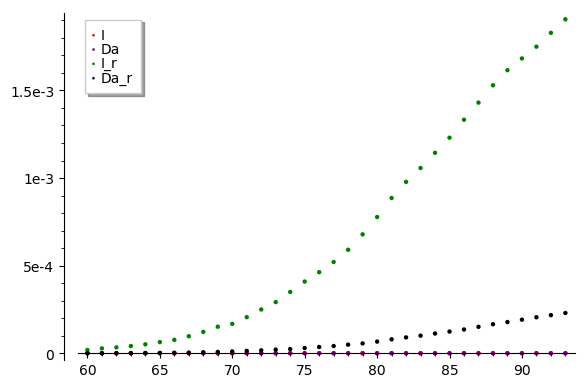

In [63]:
data1 = [(item[0], item[1]) for item in data]
data2 = [(item[0], item[2]) for item in data]

plot6 = list_plot(data1, color = 'green', pointsize = 10, alpha = 1, legend_label = 'I_r')
plot7 = list_plot(data2, color = 'black', pointsize = 10, alpha = 1, legend_label = 'Da_r')

plot6.legend()
plot7.legend()

show(plot2 + plot5 + plot6 + plot7)

In [67]:
import lmfit

/opt/sagemath-9.0/local/lib/python3.7/site-packages/past/types/oldstr.py:33: DeprecationWarning: invalid escape sequence \d
  """


In [72]:
data

[(23.0, 0.0, 0.0),
 (24.0, 0.0, 0.0),
 (25.0, 0.0, 0.0),
 (26.0, 0.0, 0.0),
 (27.0, 0.0, 0.0),
 (28.0, 0.0, 0.0),
 (29.0, 0.0, 0.0),
 (30.0, 0.0, 0.0),
 (31.0, 3.30787219996061e-08, 0.0),
 (32.0, 3.30787219996061e-08, 0.0),
 (33.0, 3.30787219996061e-08, 0.0),
 (34.0, 3.30787219996061e-08, 0.0),
 (35.0, 3.30787219996061e-08, 0.0),
 (36.0, 3.30787219996061e-08, 0.0),
 (37.0, 3.30787219996061e-08, 0.0),
 (38.0, 4.9618082999409146e-08, 0.0),
 (39.0, 4.9618082999409146e-08, 0.0),
 (40.0, 4.9618082999409146e-08, 0.0),
 (41.0, 4.9618082999409146e-08, 0.0),
 (42.0, 4.9618082999409146e-08, 0.0),
 (43.0, 4.9618082999409146e-08, 0.0),
 (44.0, 4.9618082999409146e-08, 0.0),
 (45.0, 4.9618082999409146e-08, 0.0),
 (46.0, 4.9618082999409146e-08, 0.0),
 (47.0, 4.9618082999409146e-08, 0.0),
 (48.0, 4.9618082999409146e-08, 0.0),
 (49.0, 4.9618082999409146e-08, 0.0),
 (50.0, 4.9618082999409146e-08, 0.0),
 (51.0, 4.9618082999409146e-08, 0.0),
 (52.0, 3.3078721999606097e-07, 1.653936099980305e-08),
 (53.0, 1.025440381987789e-06, 3.30787219996061e-08),
 (54.0, 2.5636009549694726e-06, 4.9618082999409146e-08),
 (55.0, 3.787513668954898e-06, 1.1577552699862134e-07),
 (56.0, 5.325674241936582e-06, 1.6539360999803048e-07),
 (57.0, 7.492330532910781e-06, 1.9847233199763658e-07),
 (58.0, 1.0833281454870997e-05, 2.8116913699665185e-07),
 (59.0, 1.4686952567825108e-05, 3.4732658099586406e-07),
 (60.0, 1.865639920777784e-05, 4.796414689942885e-07),
 (61.0, 2.8017677533666364e-05, 5.623382739933037e-07),
 (62.0, 3.367413899559901e-05, 8.600467719897586e-07),
 (63.0, 4.138148122150723e-05, 1.3066095189844409e-06),
 (64.0, 5.109008612839162e-05, 1.7697116269789264e-06),
 (65.0, 6.380885473724017e-05, 2.4478254279708515e-06),
 (66.0, 7.667647759508694e-05, 3.258254116961201e-06),
 (67.0, 9.730106076184134e-05, 3.85367111295411e-06),
 (68.0, 0.0001219777873735475, 6.053406125927916e-06),
 (69.0, 0.00015169901909019358, 7.657724142908812e-06),
 (70.0, 0.00016785797478700113, 1.0436336790875724e-05),
 (71.0, 0.0002061135167795456, 1.3678051546837122e-05),
 (72.0, 0.0002499593627900235, 1.68039907757999e-05),
 (73.0, 0.00029208511525652186, 2.093883102575066e-05),
 (74.0, 0.0003499232606728331, 2.3833219200716193e-05),
 (75.0, 0.00040929956666212604, 2.9919704048643715e-05),
 (76.0, 0.00046277132077448933, 3.569194103757498e-05),
 (77.0, 0.0005210891076597949, 4.139802058250703e-05),
 (78.0, 0.0005906701993859663, 4.925421705741348e-05),
 (79.0, 0.0006786926786269182, 5.6316524204329386e-05),
 (80.0, 0.0007776972935717392, 6.668670355120589e-05),
 (81.0, 0.0008861458836474478, 7.980241682404972e-05),
 (82.0, 0.0009781047308063528, 9.05695408349215e-05),
 (83.0, 0.0010573117306344095, 0.00010050969679580313),
 (84.0, 0.0011441268365223758, 0.0001127984420186568),
 (85.0, 0.0012302969073313497, 0.00012409482558152228),
 (86.0, 0.001332890563613128, 0.00013587085061338204),
 (87.0, 0.0014306216477609642, 0.00015107052337220105),
 (88.0, 0.0015294277903737876, 0.00016577401530102595),
 (89.0, 0.0016157136367097602, 0.00017827777221687707),
 (90.0, 0.0016826980487589624, 0.00019170773334871715),
 (91.0, 0.0017497320788911642, 0.0002055511785055523),
 (92.0, 0.0018288233031922225, 0.00021757529395240912),
 (93.0, 0.001906029040339303, 0.00023014520831225944)]

In [74]:
params = lmfit.Parameters()
params.add('B0', value = 5)
params.add('Ti', value = 14)
params.add('t0', value = 23)
params.add('alpha', value = 0.2)
params.add('rho', value = 0.1)
params.add('f', value = 0.05)


out = lmfit.minimize(residual, params, args=(data))

TypeError: residual() takes 2 positional arguments but 72 were given

In [79]:
from scipy.optimize import minimize

In [100]:
def model(t, comp, params):
    # alpha e f fixos aqui
    S = comp[0]
    E = comp[1]
    I = comp[2]
    R = comp[3]
    D = comp[4]
    A = comp[5]
    
#     S, E, I, R, D, A = comp
#     B0, Ti, t0, alpha, rho, f = params
    B0 = params[0]
    Ti = params[1]
    t0 = params[2]
    alpha = params[3]
    rho = params[4]
    f = params[5]
    
    '''
        S, E, I, R e D são os compartimentos usuais.
        B0 é o valor inicial de beta
        Ti é a taxa de mortalidade
        tempos é a partição do tempo que estamos fazendo (dia inicial de cada período, sem considerar o dia 0)
        alpha é constantes
        rho é o vetor dos rho_k para cada intervalo de tempo (usados na função de beta)
        f é constante também
    '''
    N = S + E + I + R + D
    beta = B0 * (1 - rho * (t - t0) / t)
        
    dS = -beta / N * S * I
    dE = beta / N * S * I - alpha * E
    dI = alpha * E - I / Ti
    dR = (1 - f) / Ti * I
    dD = f / Ti * I
    dA = alpha * E
    
    return [
        dS,
        dE,
        dI,
        dR,
        dD,
        dA
    ]

In [109]:
def residual(params, data):
    inits = [1 - 1e-6, 0, 1e-6, 0, 0, 0]
    tspan = [23, 93]
    B0 = params[0]
    Ti = params[1]
    t0 = params[2]
    alpha = params[3]
    rho = params[4]
    f = params[5]
    
    T = ode_solver()
    T.function = model
    inits = [1 - 1e-6, 0, 1e-6, 0, 0, 0]
    tspan = [23, 93]
    T.ode_solve(tspan, inits, num_points = 93 - 23, params = [B0, Ti, t0, alpha, rho, f])
    
    model_out_0 = [(k[0], k[1][0]) for k in T.solution]
    model_out_1 = [(k[0], k[1][1]) for k in T.solution]
    model_out_2 = [(k[0], k[1][2]) for k in T.solution]
    model_out_3 = [(k[0], k[1][3]) for k in T.solution]
    model_out_4 = [(k[0], k[1][4]) for k in T.solution]
    model_out_5 = [(k[0], k[1][5]) for k in T.solution]
    
    erro_I = 0
    erro_D = 0
    for i in range(tspan[1] - tspan[0]):
        erro_I += (model_out_2[i][1] - data[i][1])**2
        erro_D += (model_out_5[i][1] - data[i][2])**2
    
    return erro_I


In [118]:
x0 = [2, 14, 23, 0.2, 0.2, 0.05]

cons = ({'type': 'ineq', 'fun': lambda x0: x0[0]},
        {'type': 'ineq', 'fun': lambda x0: x0[1]},
        {'type': 'ineq', 'fun': lambda x0: x0[2] - 1},
        {'type': 'ineq', 'fun': lambda x0: - x0[2] + 30},
        {'type': 'ineq', 'fun': lambda x0: x0[3]},
        {'type': 'ineq', 'fun': lambda x0: x0[4]},
        {'type': 'ineq', 'fun': lambda x0: x0[5]},
        {'type': 'ineq', 'fun': lambda x0: 1 - x0[3]},
        {'type': 'ineq', 'fun': lambda x0: 1 - x0[4]},
        {'type': 'ineq', 'fun': lambda x0: 1 - x0[5]}
        )

res = minimize(residual, x0, method = 'SLSQP', args = data, tol = 1e-10, constraints = cons)
params = res.x
params

array([1.03916875e-12, 1.28693878e+01, 2.27738804e+01, 8.77742323e-13,
       1.00000000e+00, 9.38561537e-01])

/opt/sagemath-9.0/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


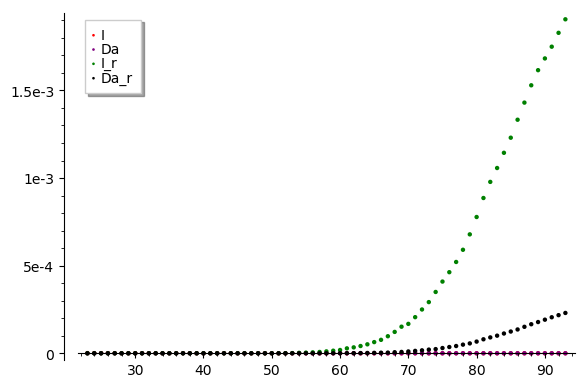

In [119]:
T = ode_solver()
T.function = model
inits = [1 - 1e-6, 0, 1e-6, 0, 0, 0]
tspan = [23, 93]
T.ode_solve(tspan, inits, num_points = 93 - 23, params = res.x)

model_out_0 = [(k[0], k[1][0]) for k in T.solution]
model_out_1 = [(k[0], k[1][1]) for k in T.solution]
model_out_2 = [(k[0], k[1][2]) for k in T.solution]
model_out_3 = [(k[0], k[1][3]) for k in T.solution]
model_out_4 = [(k[0], k[1][4]) for k in T.solution]
model_out_5 = [(k[0], k[1][5]) for k in T.solution]

plot0 = list_plot(model_out_0, color = 'green', pointsize = 10, alpha = 1, legend_label = 'S')
plot1 = list_plot(model_out_1, color = 'yellow', pointsize = 10, alpha = 1, legend_label = 'E')
plot2 = list_plot(model_out_2, color = 'red', pointsize = 10, alpha = 1, legend_label = 'I')
plot3 = list_plot(model_out_3, color = 'blue', pointsize = 10, alpha = 1, legend_label = 'R')
plot4 = list_plot(model_out_4, color = 'black', pointsize = 10, alpha = 1, legend_label = 'D')
plot5 = list_plot(model_out_5, color = 'purple', pointsize = 10, alpha = 1, legend_label = 'Da')

plot0.legend()
plot1.legend()
plot2.legend()
plot3.legend()
plot4.legend()
plot5.legend()

# show(plot0 + plot1 + plot2 + plot3 + plot4 + plot5)
# show(plot2 + plot5)

data1 = [(item[0], item[1]) for item in data]
data2 = [(item[0], item[2]) for item in data]

plot6 = list_plot(data1, color = 'green', pointsize = 10, alpha = 1, legend_label = 'I_r')
plot7 = list_plot(data2, color = 'black', pointsize = 10, alpha = 1, legend_label = 'Da_r')

plot6.legend()
plot7.legend()

show(plot2 + plot5 + plot6 + plot7)

In [120]:
res

fun: 2.6165443730415616e-05
     jac: array([ 0.00000000e+00, -1.50293999e-10,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 32
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([1.03916875e-12, 1.28693878e+01, 2.27738804e+01, 8.77742323e-13,
       1.00000000e+00, 9.38561537e-01])